## 4. White-space overview: Categories × Price bands (total market)


In [9]:
import sys
sys.path.append("..")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from src.plotting import plot_top_white_space_gaps

fashion_all = pd.read_csv("../data/processed/fashion_all.csv")

fashion_all.shape, fashion_all["retailer"].value_counts()


((963941, 9),
 retailer
 Vestiaire       900514
 Net-a-Porter     23161
 Mr Porter        20347
 SSENSE           19919
 Name: count, dtype: int64)

In [10]:
fashion_all.columns.tolist()


['retailer',
 'brand',
 'product_name',
 'description',
 'category_raw',
 'gender',
 'price_usd',
 'category_main',
 'price_band']

In [11]:
white_space = (
    fashion_all
    .groupby(["category_main", "price_band"])
    .size()
    .reset_index(name="sku_count")
)

white_space_pivot = (
    white_space
    .pivot(index="category_main", columns="price_band", values="sku_count")
    .fillna(0)
    .astype(int)
)

white_space_pivot


price_band,1000+,100–199,200–299,300–499,500–999,<100
category_main,,,,,,
Accessories,5041,48446,26867,24369,12415,62466
Bags,2137,366,324,489,790,290
Dresses,3433,8174,4370,4387,3841,8916
Knitwear & Sweats,3182,11363,5502,5632,4448,15214
Other,19177,45691,25504,23200,16814,61732
Outerwear,14418,22136,13695,16664,13965,18042
Pants & Shorts,2259,17201,8201,6886,4645,28003
Shoes,13173,66350,42632,50119,45139,56343
Skirts,759,2145,1001,1027,894,3417


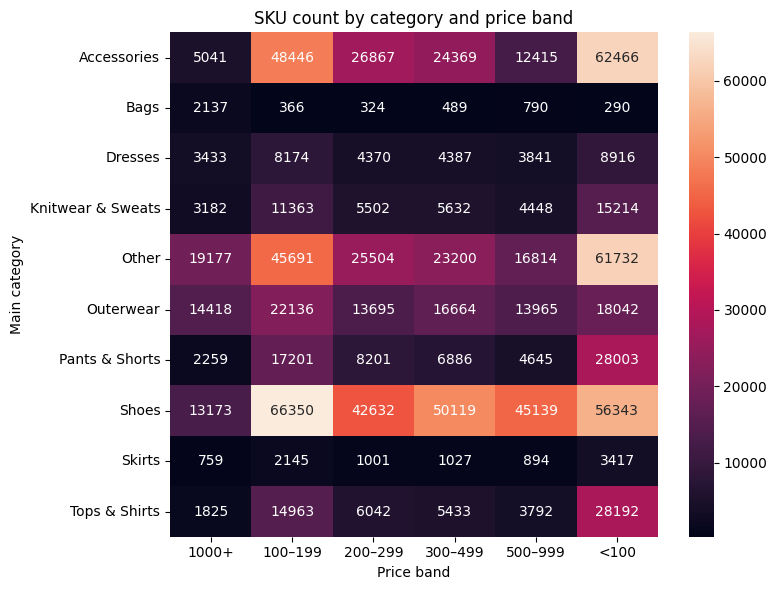

In [12]:
os.makedirs("../outputs/figures", exist_ok=True)

plt.figure(figsize=(8, 6))
sns.heatmap(
    white_space_pivot,
    annot=True,
    fmt="d"
)
plt.title("SKU count by category and price band")
plt.xlabel("Price band")
plt.ylabel("Main category")
plt.tight_layout()
plt.savefig("../outputs/figures/white_space_heatmap.png", dpi=300)

plt.show()

In [13]:
target_brand = "Boss"

brand_white_space = (
    fashion_all[fashion_all["brand"] == target_brand]
    .groupby(["category_main", "price_band"])
    .size()
    .reset_index(name="sku_count_brand")
)

white_space_brand = white_space.merge(
    brand_white_space,
    on=["category_main", "price_band"],
    how="left"
)

white_space_brand["sku_count_brand"] = (
    white_space_brand["sku_count_brand"]
    .fillna(0)
    .astype(int)
)

white_space_brand["is_white_space"] = (
    (white_space_brand["sku_count"] > 0)
    & (white_space_brand["sku_count_brand"] == 0)
)

white_space_brand.sort_values("sku_count", ascending=False)


,category_main,price_band,sku_count,sku_count_brand,is_white_space
43,Shoes,100–199,66350,276,False
5,Accessories,<100,62466,702,False
29,Other,<100,61732,501,False
47,Shoes,<100,56343,223,False
45,Shoes,300–499,50119,12,False
1,Accessories,100–199,48446,116,False
25,Other,100–199,45691,287,False
46,Shoes,500–999,45139,0,True
44,Shoes,200–299,42632,74,False
59,Tops & Shirts,<100,28192,366,False


In [14]:
white_space_gaps = (
    white_space_brand[white_space_brand["is_white_space"]]
    .sort_values("sku_count", ascending=False)
)

white_space_gaps.head(20)


,category_main,price_band,sku_count,sku_count_brand,is_white_space
46,Shoes,500–999,45139,0,True
42,Shoes,1000+,13173,0,True
4,Accessories,500–999,12415,0,True
0,Accessories,1000+,5041,0,True
40,Pants & Shorts,500–999,4645,0,True
22,Knitwear & Sweats,500–999,4448,0,True
58,Tops & Shirts,500–999,3792,0,True
12,Dresses,1000+,3433,0,True
18,Knitwear & Sweats,1000+,3182,0,True
36,Pants & Shorts,1000+,2259,0,True


In [15]:

os.makedirs("../outputs/tables", exist_ok=True)

white_space_gaps.to_csv(
    "../outputs/tables/white_space_gaps_boss.csv",
    index=False
)


### White-space analysis: Market vs. Boss

Here I look at where the **overall market** is active, but **Boss** has no products in our dataset.

For each row in the table:

- `category_main` = product group (e.g. Shoes, Bags, Dresses)
- `price_band` = price range (e.g. 100–199 €, 500–999 €, 1000+ €)
- `sku_count` = how many products the whole market has in this category + price band
- `sku_count_brand` = how many products Boss has in the same category + price band
- `is_white_space = True` = the market is present there, but Boss has **zero** products in our data

In simple words:  
these rows show **segments where there is offer and competition on the platforms, but Boss is not visible**.

A few examples from the table:

- **Shoes, 500–999 €**: the market has more than 45,000 SKUs, Boss has none.
- **Accessories, 500–999 € and 1000+ €**: high-price accessories are very present in the market, but Boss does not appear in these bands in our dataset.
- **Skirts, 100–199 €**: there are many skirts in the mid price range, but no Boss skirts in this combination.

These are **potential white-space areas**: they highlight where Boss could explore new segments or where it might be interesting to check the current assortment strategy.


<Axes: title={'center': 'Top 10 white-space segments for Boss'}, xlabel='Total SKUs in market', ylabel='Category | Price band'>

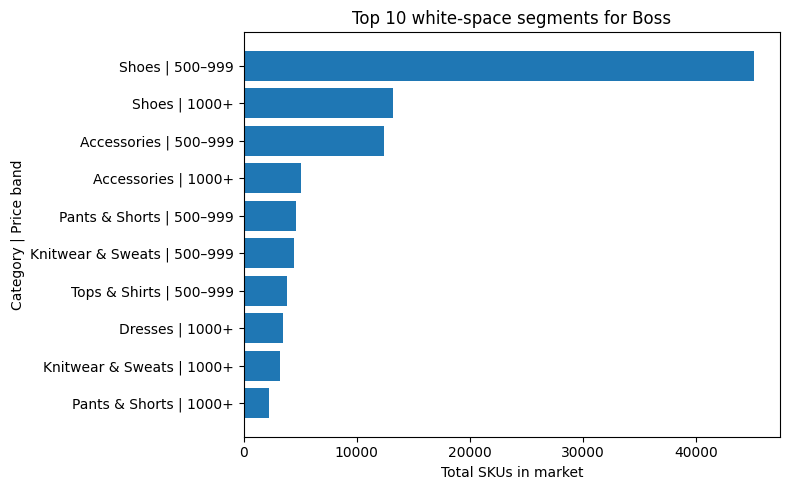

In [16]:


plot_top_white_space_gaps(
    white_space_gaps,
    brand_name=target_brand,
    n=10,
    save_path="../outputs/figures/white_space_gaps_boss.png"
)
